# 전이학습 Template
## 영상 데이터 분류

## 데이터 준비


<br>

데이터는 다음과 같이 구성됨

```
dogs/
    train/
        class1/
            file1.jpg
            file2.jpg
             ...
        class2/ 
            file21.jpg
            file22.jpg
             ...    
        class3/
            file31.jpg
            file32.jpg
             ...
        ...
    test/
        class1/
            file8.jpg
            file9.jpg
             ...
        class2/ 
            file28.jpg
            file29.jpg
             ...    
        class3/
            file38.jpg
            file39.jpg
             ...
        ...
    
```

### 이미지 크롭시켜 압축한 파일 가져옴
영상데이터 학습 후 크롭 처리까지 마친 상태

In [ ]:
!unzip face_cropped.zip

Archive:  face_cropped.zip
   creating: face_cropped/e/
  inflating: face_cropped/e/e_1_cropped_0.jpg  
  inflating: face_cropped/e/e_10_cropped_0.jpg  
  inflating: face_cropped/e/e_11_cropped_0.jpg  
  inflating: face_cropped/e/e_12_cropped_0.jpg  
  inflating: face_cropped/e/e_13_cropped_0.jpg  
  inflating: face_cropped/e/e_14_cropped_0.jpg  
  inflating: face_cropped/e/e_15_cropped_0.jpg  
  inflating: face_cropped/e/e_16_cropped_0.jpg  
  inflating: face_cropped/e/e_2_cropped_0.jpg  
  inflating: face_cropped/e/e_3_cropped_0.jpg  
  inflating: face_cropped/e/e_4_cropped_0.jpg  
  inflating: face_cropped/e/e_5_cropped_0.jpg  
  inflating: face_cropped/e/e_6_cropped_0.jpg  
  inflating: face_cropped/e/e_7_cropped_0.jpg  
  inflating: face_cropped/e/e_8_cropped_0.jpg  
  inflating: face_cropped/e/e_9_cropped_0.jpg  
   creating: face_cropped/iu/
  inflating: face_cropped/iu/iu_1_cropped_0.jpg  
  inflating: face_cropped/iu/iu_10_cropped_0.jpg  
  inflating: face_cropped/iu/iu_11_cro

## 전이학습
EfficientNetB2

31801344/31790344 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 7, 7, 1408)       7768569   
                                                                 
 flatten (Flatten)           (None, 68992)             0         
                                                                 
 dense (Dense)               (None, 256)               17662208  
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 25,432,572
Trainable params: 17,663,491
Non

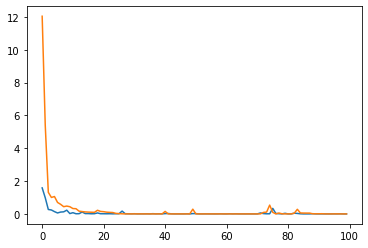

1/1 [==============================] - 0s 150ms/step - loss: 1.1002e-06 - acc: 1.0000
loss= 1.1001931170540047e-06
acc= 1.0


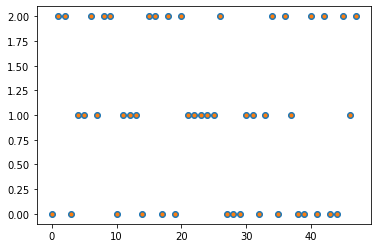

label category index = 0.0
predicted category index = 0
predicted category name = e


In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = keras.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "face_cropped",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "face_cropped",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      epochs=100
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


## 학습된 모델 드라이브에 저장

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
model.save('/gdrive/MyDrive/tmp/face_classification.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
